In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
mpl.rcParams['figure.figsize'] = (16,4)

In [2]:
sample = [181.37984274, 154.80600659, 182.33424888, 170.32065307, 179.82634437,
          168.73723578, 164.28520413, 171.93415101, 171.71090179, 177.69136458,
          153.38183565, 151.13269527, 166.4994225,  828.37581774, 168.02278222,
          169.29065423, 138.46062748, 174.88588464, 155.01472584, 164.27356639]

sample_no_out = [181.37984274, 154.80600659, 182.33424888, 170.32065307, 179.82634437,
          168.73723578, 164.28520413, 171.93415101, 171.71090179, 177.69136458,
          153.38183565, 151.13269527, 166.4994225,  168.02278222,
          169.29065423, 138.46062748, 174.88588464, 155.01472584, 164.27356639]

mean = np.mean(sample)
std = np.std(sample)

print('A média da amostra é:', mean)

print('O desvio padrão da amostra é:', std)

A média da amostra é: 199.61819824499997
O desvio padrão da amostra é: 144.66304885534453


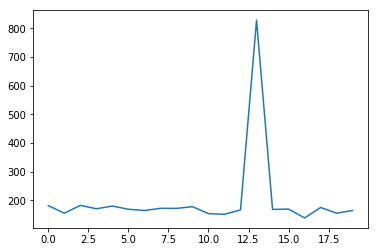

In [3]:
plt.plot(sample)

plt.show()

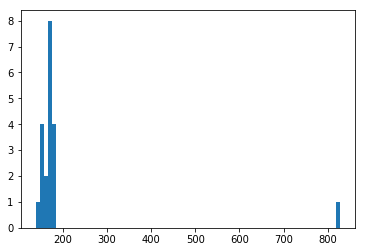

(array([1., 4., 2., 7., 5.]),
 array([138.46062748, 147.23535176, 156.01007604, 164.78480032,
        173.5595246 , 182.33424888]),
 <a list of 5 Patch objects>)

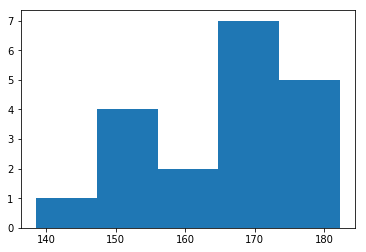

In [4]:
plt.hist(sample, bins=75)

plt.show()

plt.hist(sample_no_out, bins=5)


In [5]:
np.zeros(len(sample))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

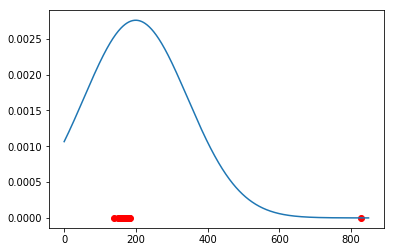

In [6]:
def gauss_value(points, mu, std):
    y_gauss = ( 1/(std * np.sqrt(2 * np.pi)) ) * np.e**( -0.5 * (points-mu)**2 / std**2) 
    return y_gauss

x_base = np.arange(0, 850)
y_gauss = gauss_value(x_base, np.mean(sample), np.std(sample))

plt.plot(sample, np.zeros(len(sample)), 'ro')
plt.plot(x_base, y_gauss)

plt.show()


In [7]:
# cdf(x > val)
print (1 - norm.cdf(180, mean, std))

0.553936408464352


In [8]:
# cdf(x < val)
# print (norm.cdf(120, mean, std))

result = (norm.cdf(120, mean, std)) + (1 - norm.cdf(190, mean, std))

print(result)

std_est = np.sqrt(np.sum((sample - np.mean(sample))**2)/(len(sample)-1))
print(std_est)


0.8175377279881878
148.42115647222053


In [9]:
# cdf(v1 < x < v2)
print (norm.cdf(180, mean, std) - norm.cdf(200, mean, std))

-0.05498931511311822


In [10]:
mu_range = np.arange(135, 182, 1)
std_range = np.arange(1, 140, 1)


# forma muito burra de se fazer


best_mus = []
best_stds = []

lista = list((3/4)**np.arange(0,40,1))
lista.append(0)
for c in lista:

    best_mu = - np.inf
    best_std = - np.inf
    max_loglikelihood = - np.inf

    for mu_t in mu_range:
        for std_t in std_range:
            y_gauss = gauss_value(sample, mu_t, std_t)
            log_likelihood = np.sum(np.log(y_gauss + c))

            if log_likelihood > max_loglikelihood :
                max_loglikelihood = log_likelihood
                best_mu = mu_t
                best_std = std_t
    
    best_mus.append(best_mu)
    best_stds.append(best_std)

best_mu = best_mus[-2]
best_std = best_stds[-2]

c:\python\python36-32\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


In [11]:
print("MELHOR MU : ", best_mu)
print("MELHOR STD: ", best_std)

print("MELHOR MU  (c=0): ", best_mus[-1])
print("MELHOR STD (c=0): ", best_stds[-1])

print("MU AMOSTRA : ", mean)
print("STD AMOSTRA: ", std)

print("MU AMOSTRA SEM OUTLIER : ", np.mean(sample_no_out))
print("STD AMOSTRA SEM OUTLIER: ", np.std(sample_no_out))

MELHOR MU :  167
MELHOR STD:  11
MELHOR MU  (c=0):  181
MELHOR STD (c=0):  139
MU AMOSTRA :  199.61819824499997
STD AMOSTRA:  144.66304885534453
MU AMOSTRA SEM OUTLIER :  166.52569195578945
STD AMOSTRA SEM OUTLIER:  11.24989948944472


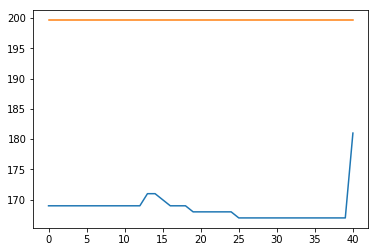

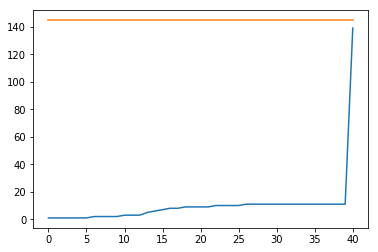

In [12]:
plt.plot(best_mus)
plt.plot((np.array(best_mus)**0)*mean)
plt.show()

plt.plot(best_stds)
plt.plot((np.array(best_mus)**0)*std)
plt.show()

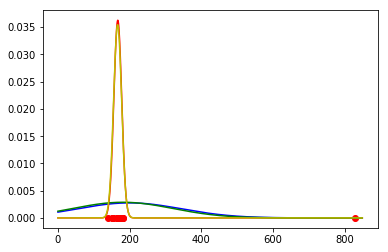

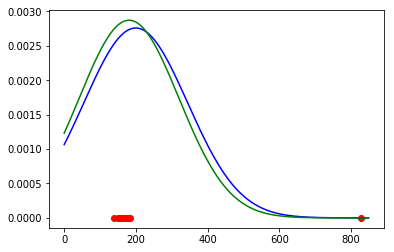

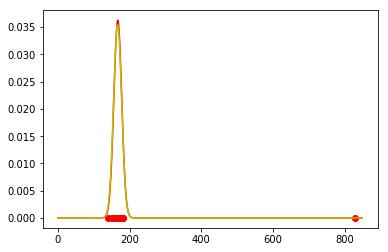

In [13]:
y_gauss = gauss_value(x_base, mean, std)
y_gauss_max = gauss_value(x_base, best_mu, best_std)
y_gauss_grid_c0 = gauss_value(x_base, best_mus[-1], best_stds[-1])
y_gauss_no_out = gauss_value(x_base, np.mean(sample_no_out), np.std(sample_no_out))

plt.plot(sample, np.zeros(len(sample)), 'ro')
plt.plot(x_base, y_gauss, 'b')
plt.plot(x_base, y_gauss_max, 'r')
plt.plot(x_base, y_gauss_grid_c0, 'g')
plt.plot(x_base, y_gauss_no_out, 'y')
plt.show()

plt.plot(sample, np.zeros(len(sample)), 'ro')
plt.plot(x_base, y_gauss, 'b')
plt.plot(x_base, y_gauss_grid_c0, 'g')
plt.show()

plt.plot(sample, np.zeros(len(sample)), 'ro')
plt.plot(x_base, y_gauss_max, 'r')
plt.plot(x_base, y_gauss_no_out, 'y')
plt.show()


In [14]:
norm.ppf(norm.cdf(1))

1.0

In [15]:
ll0 = np.sum(np.log(norm.pdf(sample, mean, std)))
ll1 = np.sum(np.log(norm.pdf(sample, best_mu, best_std)))
print("Curva azul: ", ll0)
print("Curva vermelha", ll1)

Curva azul:  -127.866915408238
Curva vermelha -inf


c:\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [18]:
amostra2 = [51,54,78,42,78,73]
mu2 = 50
std2 = 5

std_amostral = std2/np.sqrt(len(amostra2))

print("Mean: ", np.mean(amostra2))
print("Std : ", np.std(amostra2))

print(std_amostral)


media_amostra = np.mean(amostra2)


n_std = (media_amostra - mu2)/std_amostral

print(n_std)

prob = 1 - norm.cdf(n_std)

print(prob)

Mean:  62.666666666666664
Std :  14.232201360139461
2.041241452319315
6.205374015050716
2.7283486581097804e-10
